#  Pandas

pandas 是一个 Python Data Analysis Library。


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##  新建

Series
一维 Series 可以用一维列表初始化：

In [4]:
s = pd.Series([1,3,5,np.nan,6,8])

print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [ ]:
DataFrame
DataFrame 则是个二维结构，这里首先构造一组时间序列，作为我们第一维的下标：

In [5]:
dates = pd.date_range('20130101', periods=6)

print (dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [6]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

df

,A,B,C,D
2013-01-01,1.269790,-0.876573,-0.110758,-1.200370
2013-01-02,0.786247,2.296275,-1.114447,0.968246
2013-01-03,-0.095355,-1.579050,0.968428,1.404492
2013-01-04,1.496168,1.323222,0.204936,-0.268012
2013-01-05,-0.686149,-2.020476,-0.953438,0.359009
2013-01-06,1.785962,1.636552,-0.651861,-1.264280



默认情况下，如果不指定 index 参数和 columns，那么他们的值将用从 0 开始的数字替代。

除了向 DataFrame 中传入二维数组，我们也可以使用字典传入数据：

In [7]:

df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


## 查看数据

In [8]:
df.head()

,A,B,C,D
2013-01-01,1.269790,-0.876573,-0.110758,-1.200370
2013-01-02,0.786247,2.296275,-1.114447,0.968246
2013-01-03,-0.095355,-1.579050,0.968428,1.404492
2013-01-04,1.496168,1.323222,0.204936,-0.268012
2013-01-05,-0.686149,-2.020476,-0.953438,0.359009


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,1.496168,1.323222,0.204936,-0.268012
2013-01-05,-0.686149,-2.020476,-0.953438,0.359009
2013-01-06,1.785962,1.636552,-0.651861,-1.264280


In [10]:

df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.values

array([[ 1.26979013, -0.87657344, -0.11075841, -1.20037008],
       [ 0.78624684,  2.29627459, -1.11444692,  0.96824583],
       [-0.09535494, -1.57904995,  0.96842827,  1.4044919 ],
       [ 1.49616831,  1.32322176,  0.20493564, -0.26801201],
       [-0.68614887, -2.02047559, -0.95343815,  0.35900932],
       [ 1.78596157,  1.6365525 , -0.65186148, -1.2642798 ]])

## 统计数据

简单的统计数据：

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.759444,0.129992,-0.276190,-0.000152
std,0.967274,1.840913,0.788720,1.109063
min,-0.686149,-2.020476,-1.114447,-1.264280
25%,0.125046,-1.403431,-0.878044,-0.967281
50%,1.028018,0.223324,-0.381310,0.045499
75%,1.439574,1.558220,0.126012,0.815937
max,1.785962,2.296275,0.968428,1.404492



## 转置
df.T
## 排序
sort_index(axis=0, ascending=True) 方法按照下标大小进行排序，axis=0 表示按第 0 维进行排序。
## 索引
虽然 DataFrame 支持 Python/Numpy 的索引语法，但是推荐使用 .at, .iat, .loc, .iloc 和 .ix 方法进行索引。

loc 可以方便的使用 label 进行索引：
    

In [13]:

df.loc[dates[0]]

A    1.269790
B   -0.876573
C   -0.110758
D   -1.200370
Name: 2013-01-01 00:00:00, dtype: float64

In [14]:

df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.786247,2.296275
2013-01-03,-0.095355,-1.579050
2013-01-04,1.496168,1.323222


In [15]:
df.loc[dates[0],'B']

-0.8765734408092739


不过得到标量值可以用 at，速度更快：

In [17]:
print (df.at[dates[0],'B'])

-0.8765734408092739


In [18]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,1.496168,1.323222
2013-01-05,-0.686149,-2.020476


索引不连续的部分：df.iloc[[1,2,4],[0,2]]
索引整行：df.iloc[1:3,:]
整列：df.iloc[:, 1:3]
标量

In [19]:
df.iloc[1,1]

2.2962745932379605

布尔型索引
所有 A 列大于 0 的行：df[df.A > 0]
只留下所有大于 0 的数值


In [20]:
df[df > 0]

,A,B,C,D
2013-01-01,1.269790,NaN,NaN,NaN
2013-01-02,0.786247,2.296275,NaN,0.968246
2013-01-03,NaN,NaN,0.968428,1.404492
2013-01-04,1.496168,1.323222,0.204936,NaN
2013-01-05,NaN,NaN,NaN,0.359009
2013-01-06,1.785962,1.636552,NaN,NaN


In [21]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']

df2

,A,B,C,D,E
2013-01-01,1.269790,-0.876573,-0.110758,-1.200370,one
2013-01-02,0.786247,2.296275,-1.114447,0.968246,one
2013-01-03,-0.095355,-1.579050,0.968428,1.404492,two
2013-01-04,1.496168,1.323222,0.204936,-0.268012,three
2013-01-05,-0.686149,-2.020476,-0.953438,0.359009,four
2013-01-06,1.785962,1.636552,-0.651861,-1.264280,three


In [22]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.095355,-1.579050,0.968428,1.404492,two
2013-01-05,-0.686149,-2.020476,-0.953438,0.359009,four


设定数据的值

In [23]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
df['F'] = s1

df

,A,B,C,D,F
2013-01-01,1.269790,-0.876573,-0.110758,-1.200370,NaN
2013-01-02,0.786247,2.296275,-1.114447,0.968246,1.0
2013-01-03,-0.095355,-1.579050,0.968428,1.404492,2.0
2013-01-04,1.496168,1.323222,0.204936,-0.268012,3.0
2013-01-05,-0.686149,-2.020476,-0.953438,0.359009,4.0
2013-01-06,1.785962,1.636552,-0.651861,-1.264280,5.0



或者使用 at 或 iat 修改单个值：
df.at[dates[0],'A'] = 0

df.iat[0, 1] = 0
设定一整列：
df.loc[:,'D'] = np.array([5] * len(df))

In [24]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,-1.269790,-0.876573,-0.110758,-1.200370,NaN
2013-01-02,-0.786247,-2.296275,-1.114447,-0.968246,-1.0
2013-01-03,-0.095355,-1.579050,-0.968428,-1.404492,-2.0
2013-01-04,-1.496168,-1.323222,-0.204936,-0.268012,-3.0
2013-01-05,-0.686149,-2.020476,-0.953438,-0.359009,-4.0
2013-01-06,-1.785962,-1.636552,-0.651861,-1.264280,-5.0


## 缺失数据

In [25]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1

df1

,A,B,C,D,F,E
2013-01-01,1.269790,-0.876573,-0.110758,-1.200370,NaN,1.0
2013-01-02,0.786247,2.296275,-1.114447,0.968246,1.0,1.0
2013-01-03,-0.095355,-1.579050,0.968428,1.404492,2.0,NaN
2013-01-04,1.496168,1.323222,0.204936,-0.268012,3.0,NaN


丢弃所有缺失数据的行得到的新数据：df1.dropna(how='any')
填充缺失数据：df1.fillna(value=5)
检查缺失数据的位置：pd.isnull(df1)

## 计算操作

每一列的均值：df.mean()

每一行的均值：df.mean(1)

相减 df - s：df.sub(s, axis='index')
###  apply 操作

与 R 中的 apply 操作类似，接收一个函数，默认是对将函数作用到每一列上：

In [26]:
df.apply(lambda x: x.max() - x.min())

A    2.472110
B    4.316750
C    2.082875
D    2.668772
F    4.000000
dtype: float64

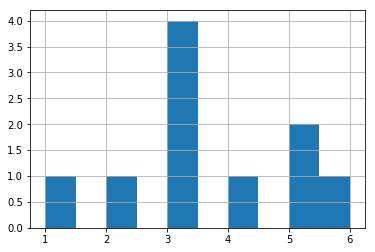

In [27]:
s = pd.Series(np.random.randint(0, 7, size=10))
h = s.hist()

### 合并
连接
pieces = [df[:2], df[4:5], df[7:]]

pd.concat(pieces)

数据库中的 Join

In [28]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [29]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
s = df.iloc[3]

df.append(s, ignore_index=True)

,A,B,C,D
0,1.655539,-0.318882,0.942158,-0.830680
1,0.362009,0.772640,-0.125630,0.690530
2,-0.596408,-0.735967,-1.291793,-0.332085
3,0.214957,-0.351520,-1.302724,-0.572392
4,1.029962,-0.286062,0.398359,0.679257
5,0.924227,-0.326239,0.232994,1.051954
6,-1.826236,0.732633,-0.152049,-0.086297
7,-1.482700,0.292183,-1.388155,-0.747202
8,0.214957,-0.351520,-1.302724,-0.572392


### Grouping

In [32]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df


,A,B,C,D
0,foo,one,0.282354,0.912054
1,bar,one,0.463657,0.214232
2,foo,two,0.650476,-0.258726
3,bar,three,-1.511341,0.985497
4,foo,two,1.347021,-0.520122
5,bar,two,0.152067,1.636703
6,foo,one,-1.356148,0.464260
7,foo,three,-0.857483,0.821854


In [33]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.895617,2.836432
foo,0.066219,1.419319


### 绘图
使用 ggplot 风格

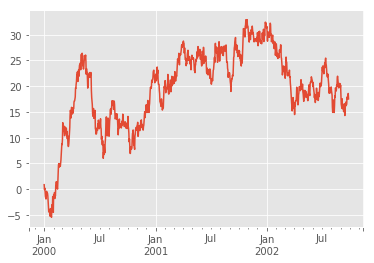

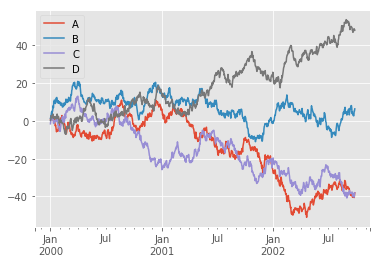

In [35]:

plt.style.use('ggplot')
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

p = ts.cumsum().plot()
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

df.cumsum().plot()
p = plt.legend(loc="best")

### 文件读写
csv
写入文件：df.to_csv('foo.csv')

从文件中读取：pd.read_csv('foo.csv').head()

hdf5
写入文件：df.to_hdf("foo.h5", "df")
从文件中读取：pd.read_hdf('foo.h5','df').head()

excel
写入文件：df.to_excel('foo.xlsx', sheet_name='Sheet1')
从文件中读取：pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()
